# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**So interpretation is important!**

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
bike_data = pd.read_csv("day.csv")
bike_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,654,16-10-2019,4,1,10,0,2,1,1,19.201653,23.04230,55.8333,12.208807,922,6612,7534
410,411,15-02-2019,1,1,2,0,3,1,1,14.281653,17.58145,53.1250,12.167200,141,4028,4169
224,225,13-08-2018,3,0,8,0,6,0,2,28.119153,32.29290,72.9583,14.167418,1504,2646,4150
593,594,17-08-2019,3,1,8,0,5,1,1,29.656653,12.12000,57.0833,15.500718,1483,5665,7148
492,493,08-05-2019,2,1,5,0,2,1,2,23.848347,27.87355,68.5833,19.833943,738,4990,5728


In [3]:
# Let's look at the number of rows and columns in the dataset
bike_data.shape

(730, 16)

In [4]:
# Understanding the feature names in the dataset
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Getting insights of the features
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


## Understanding the Data Dicitionary and parts of Data Preperation
   Data Dictionary contains various attributes some of which are explored and manipulated here:

In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Converting date column to datetime format
bike_data['dteday'] = bike_data['dteday'].astype('datetime64')
bike_data['dteday']

0     2018-01-01
1     2018-02-01
2     2018-03-01
3     2018-04-01
4     2018-05-01
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [9]:
## As we can see in the season there are some values which are in integer. If we check the Data Dicitionary it states `1=spring, 2-summer,3-fall,4-winter`

In [10]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
bike_data.loc[(bike_data['season'] == 1) , 'season'] = 'spring'

# 2=summer
bike_data.loc[(bike_data['season'] == 2) , 'season'] = 'summer'

# 3=fall
bike_data.loc[(bike_data['season'] == 3) , 'season'] = 'fall'

# 4=winter
bike_data.loc[(bike_data['season'] == 4) , 'season'] = 'winter'

In [11]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bike_data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# Changing integer values of months to respective month names mentioned as data dictionary
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bike_data[['mnth']] = bike_data[['mnth']].apply(month_map)

# Checking whether the conversion is done properly or not
bike_data['mnth'].value_counts()

Oct     62
Jan     62
Mar     62
Aug     62
May     62
Jul     62
Dec     62
Nov     60
Jun     60
Sept    60
Apr     60
Feb     56
Name: mnth, dtype: int64

In [13]:
# Changing integer values of weekdays to respective week names mentioned as data dictionary
def month_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
bike_data[['weekday']] = bike_data[['weekday']].apply(month_map)

# Checking whether the conversion is done properly or not
bike_data['weekday'].value_counts()

Tues     105
Wed      105
Mon      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [14]:
# Changing long weathersit names into string values as mentioned in data dictionary file

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike_data.loc[(bike_data['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike_data.loc[(bike_data['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike_data.loc[(bike_data['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_data.loc[(bike_data['weathersit'] == 4) , 'weathersit'] = 'D'

In [15]:
# Checking count on weather data
bike_data['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [16]:
# Checking count on working day data
bike_data['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
# Checking count on holiday data
bike_data['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

### 2. Data Visualisation

Let's do some - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on
- we gonna identify if some variables will directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn` libraries.

In [18]:
bike_data.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Using the above result we gonna plot some distribution plot for the numeric plots
    - Like Temperature, cnt, humidity, feeling temperature, wind speed

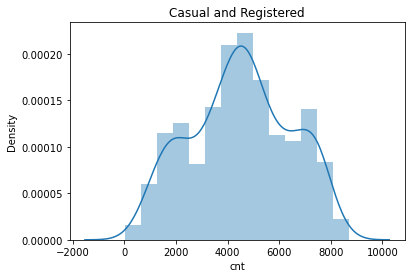

In [19]:
sns.distplot(bike_data['cnt'])
plt.title('Casual and Registered')
plt.show()

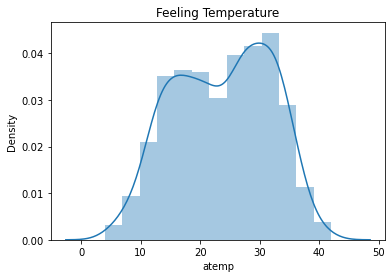

In [20]:
sns.distplot(bike_data['atemp'])
plt.title('Feeling Temperature')
plt.show()

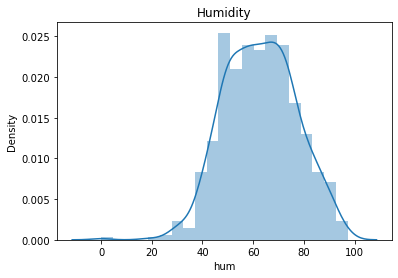

In [21]:
sns.distplot(bike_data['hum'])
plt.title('Humidity')
plt.show()

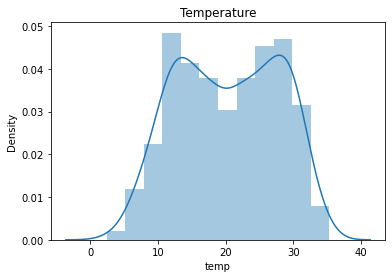

In [22]:
sns.distplot(bike_data['temp'])
plt.title('Temperature')
plt.show()

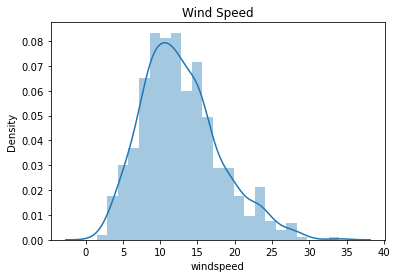

In [23]:
sns.distplot(bike_data['windspeed'])
plt.title('Wind Speed')
plt.show()

In [24]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [25]:
num_col = bike_data._get_numeric_data().columns
num_col

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [26]:
cat_var = bike_data[['season','yr','mnth','holiday','weekday','workingday','weathersit']]
cat_var

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,0,B
1,spring,0,Jan,0,Tues,0,B
2,spring,0,Jan,0,Wed,1,A
3,spring,0,Jan,0,Thurs,1,A
4,spring,0,Jan,0,Fri,1,A
...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Sat,1,B
726,spring,1,Dec,0,Sun,1,B
727,spring,1,Dec,0,Mon,0,B
728,spring,1,Dec,0,Tues,0,A


#### Visualising Categorical Variables

Let's make a boxplot for some of these variables and see the data distribution

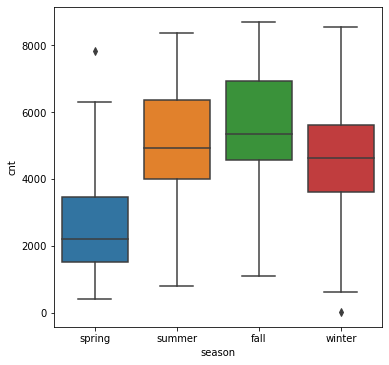

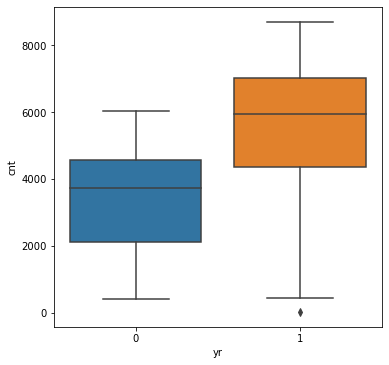

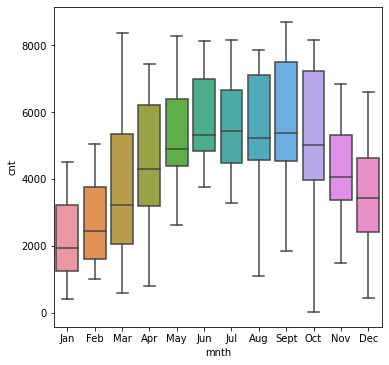

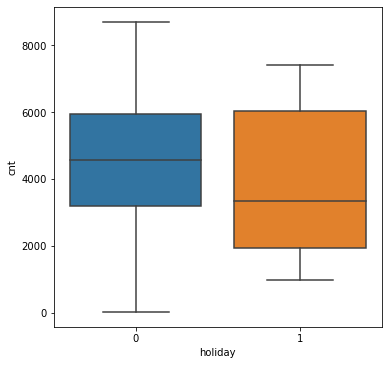

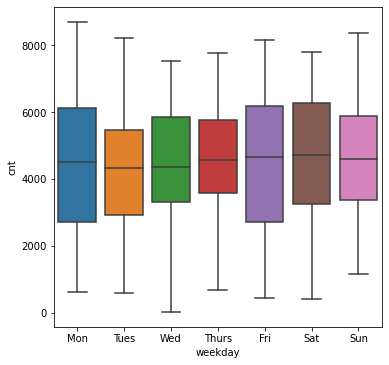

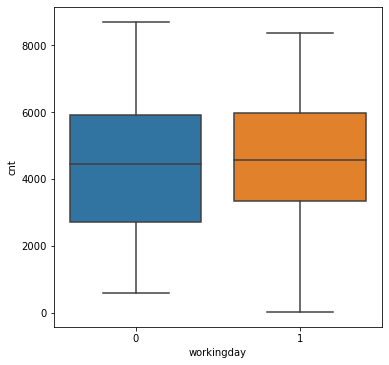

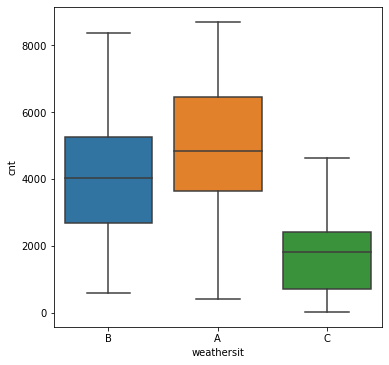

In [27]:
cat_list = [i for i in cat_var.columns]
i = 0
for each_cat in range(len(cat_var.columns)):
    plt.figure(figsize=(20, 20))  
    plt.subplot(3,3,each_cat+1)
    sns.boxplot(x = cat_list[i], y = 'cnt', data = bike_data)
    i += 1

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [28]:
bike_data.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [29]:
num_var = bike_data[['temp','atemp','hum','windspeed','casual','registered','cnt']]
num_var.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


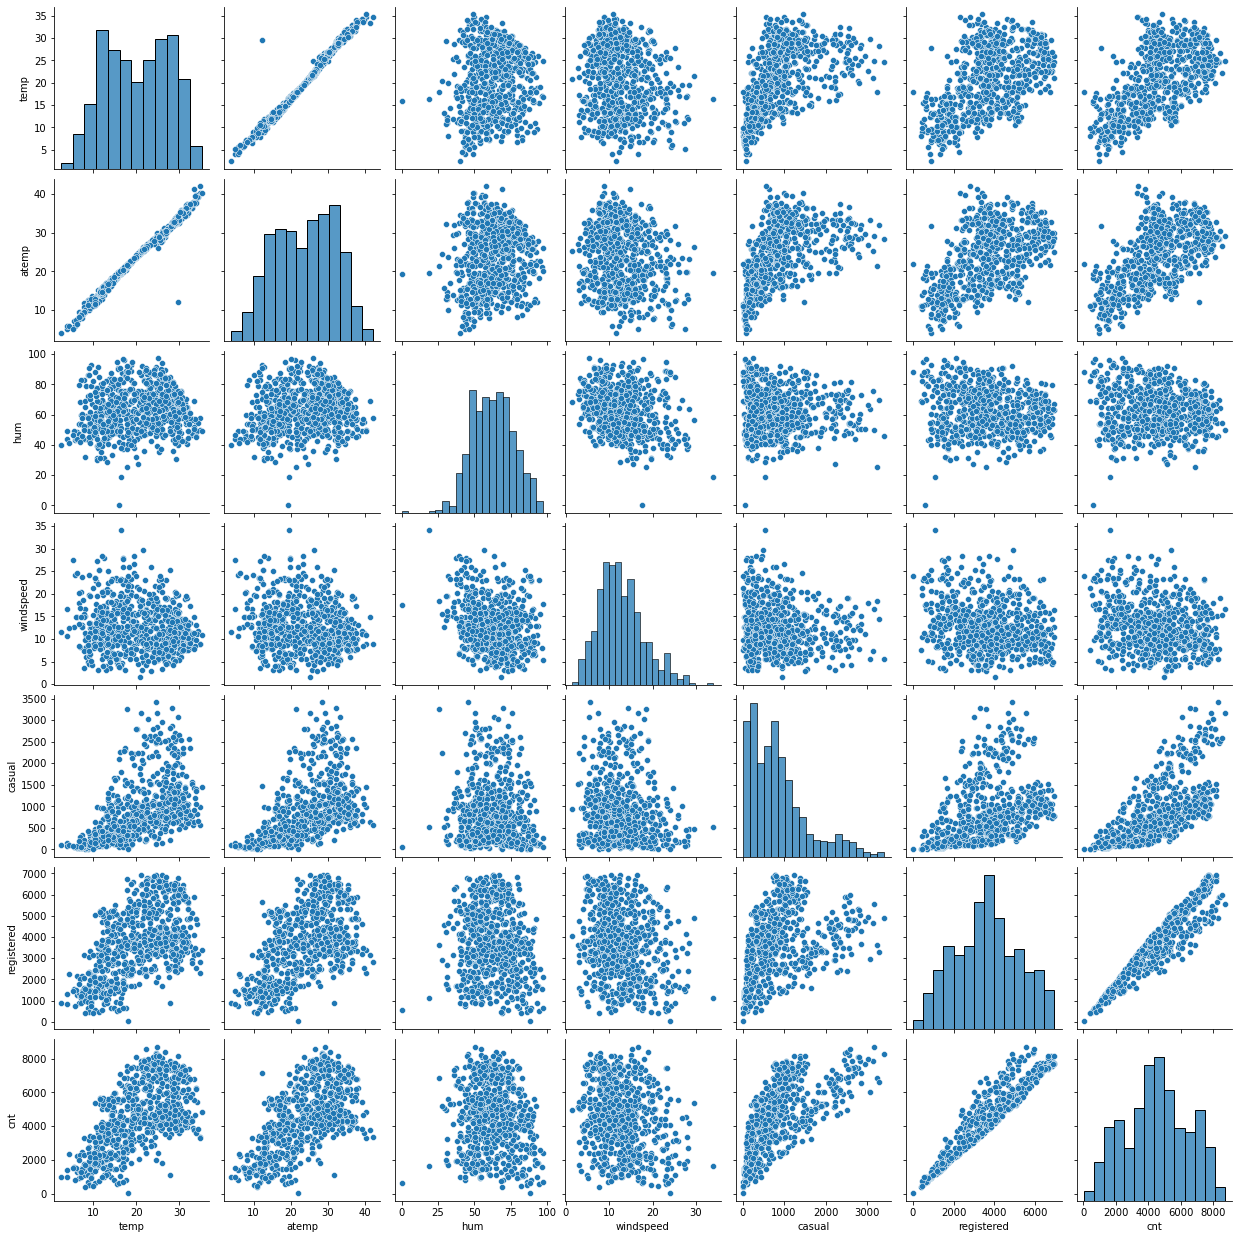

In [30]:
# Let's go with the pairwise scatter plot
sns.pairplot(num_var)
plt.show()

#### For better understanding let's see correlation between the variables to know how exactly the variables are correlated

In [31]:
corr = num_var.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


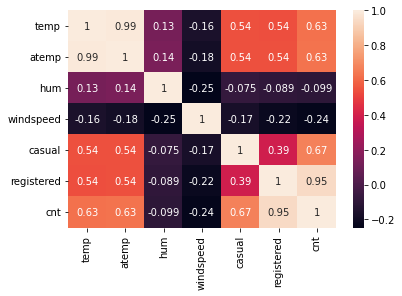

In [32]:
# Plot the correlation using a heatmap for visualization
sns.heatmap(corr, annot=True)

By the above heatmap we can see some useful insights
Correlation with the dependent variable `cnt` with independent variables are:
- Count variable has very high correlation with `casual` and `registered` variables which gives more importance to the Count following with `atemp` and `temp` which has same value.
- Coming to negative correlation `count` variable is negatively correlated `windspeed` this gives us a clear idea of bike sales will be less on windy days as compared to normal days.
- There are few more other independent variables which are highly correlated in the plot like `temp` and `atemp` value almost equals to 1 which may lead to drop any of the variable.

By the above information we need to more caution to multicollinearity while building the model.

In [33]:
#removing atemp as it is highly correlated with temp
bike_data.drop('atemp',axis=1,inplace=True)
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,B,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,0,B,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,82,1518,1600


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Before building model will create a dummy variable for required columns.


In [34]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 85.7+ 

In [35]:
# Subset all categorical variables
# Convert to 'category' data type

bike_data['season']=bike_data['season'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [36]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_data = pd.get_dummies(bike_data, drop_first=True)
bike_data

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247,1867,...,0,0,0,1,0,0,0,0,1,0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644,2451,...,0,0,0,0,1,0,0,0,1,0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159,1182,...,0,0,1,0,0,0,0,0,1,0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364,1432,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bike_data=bike_data.drop(['instant','dteday'], axis = 1, inplace = False)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

- Let's start building the model. The first step to model building is the usual - test-train split. So let's perform that
- After splitting the data we need to scale the varibales. As we cna only scale numeric values we already created a list of numeric values.
- Scaling need to be done on Training Data.
- After Scaling we perform the heatmap correlation for checking the highly correlated variables.

In [38]:
# Split the dataframe into train and test sets
df_train, df_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

# Scaling
#### We gonna use MinMax Scaling technique as it can handle the outlier data in scaling purpose.

In [39]:
scaler = MinMaxScaler()
# Applying the scaling technique to the required columns
scal_var = ['temp','hum','casual','registered','cnt', 'windspeed']
df_train[scal_var] = scaler.fit_transform(df_train[scal_var])
#Checking whether scaling is done properly or not
# df_train

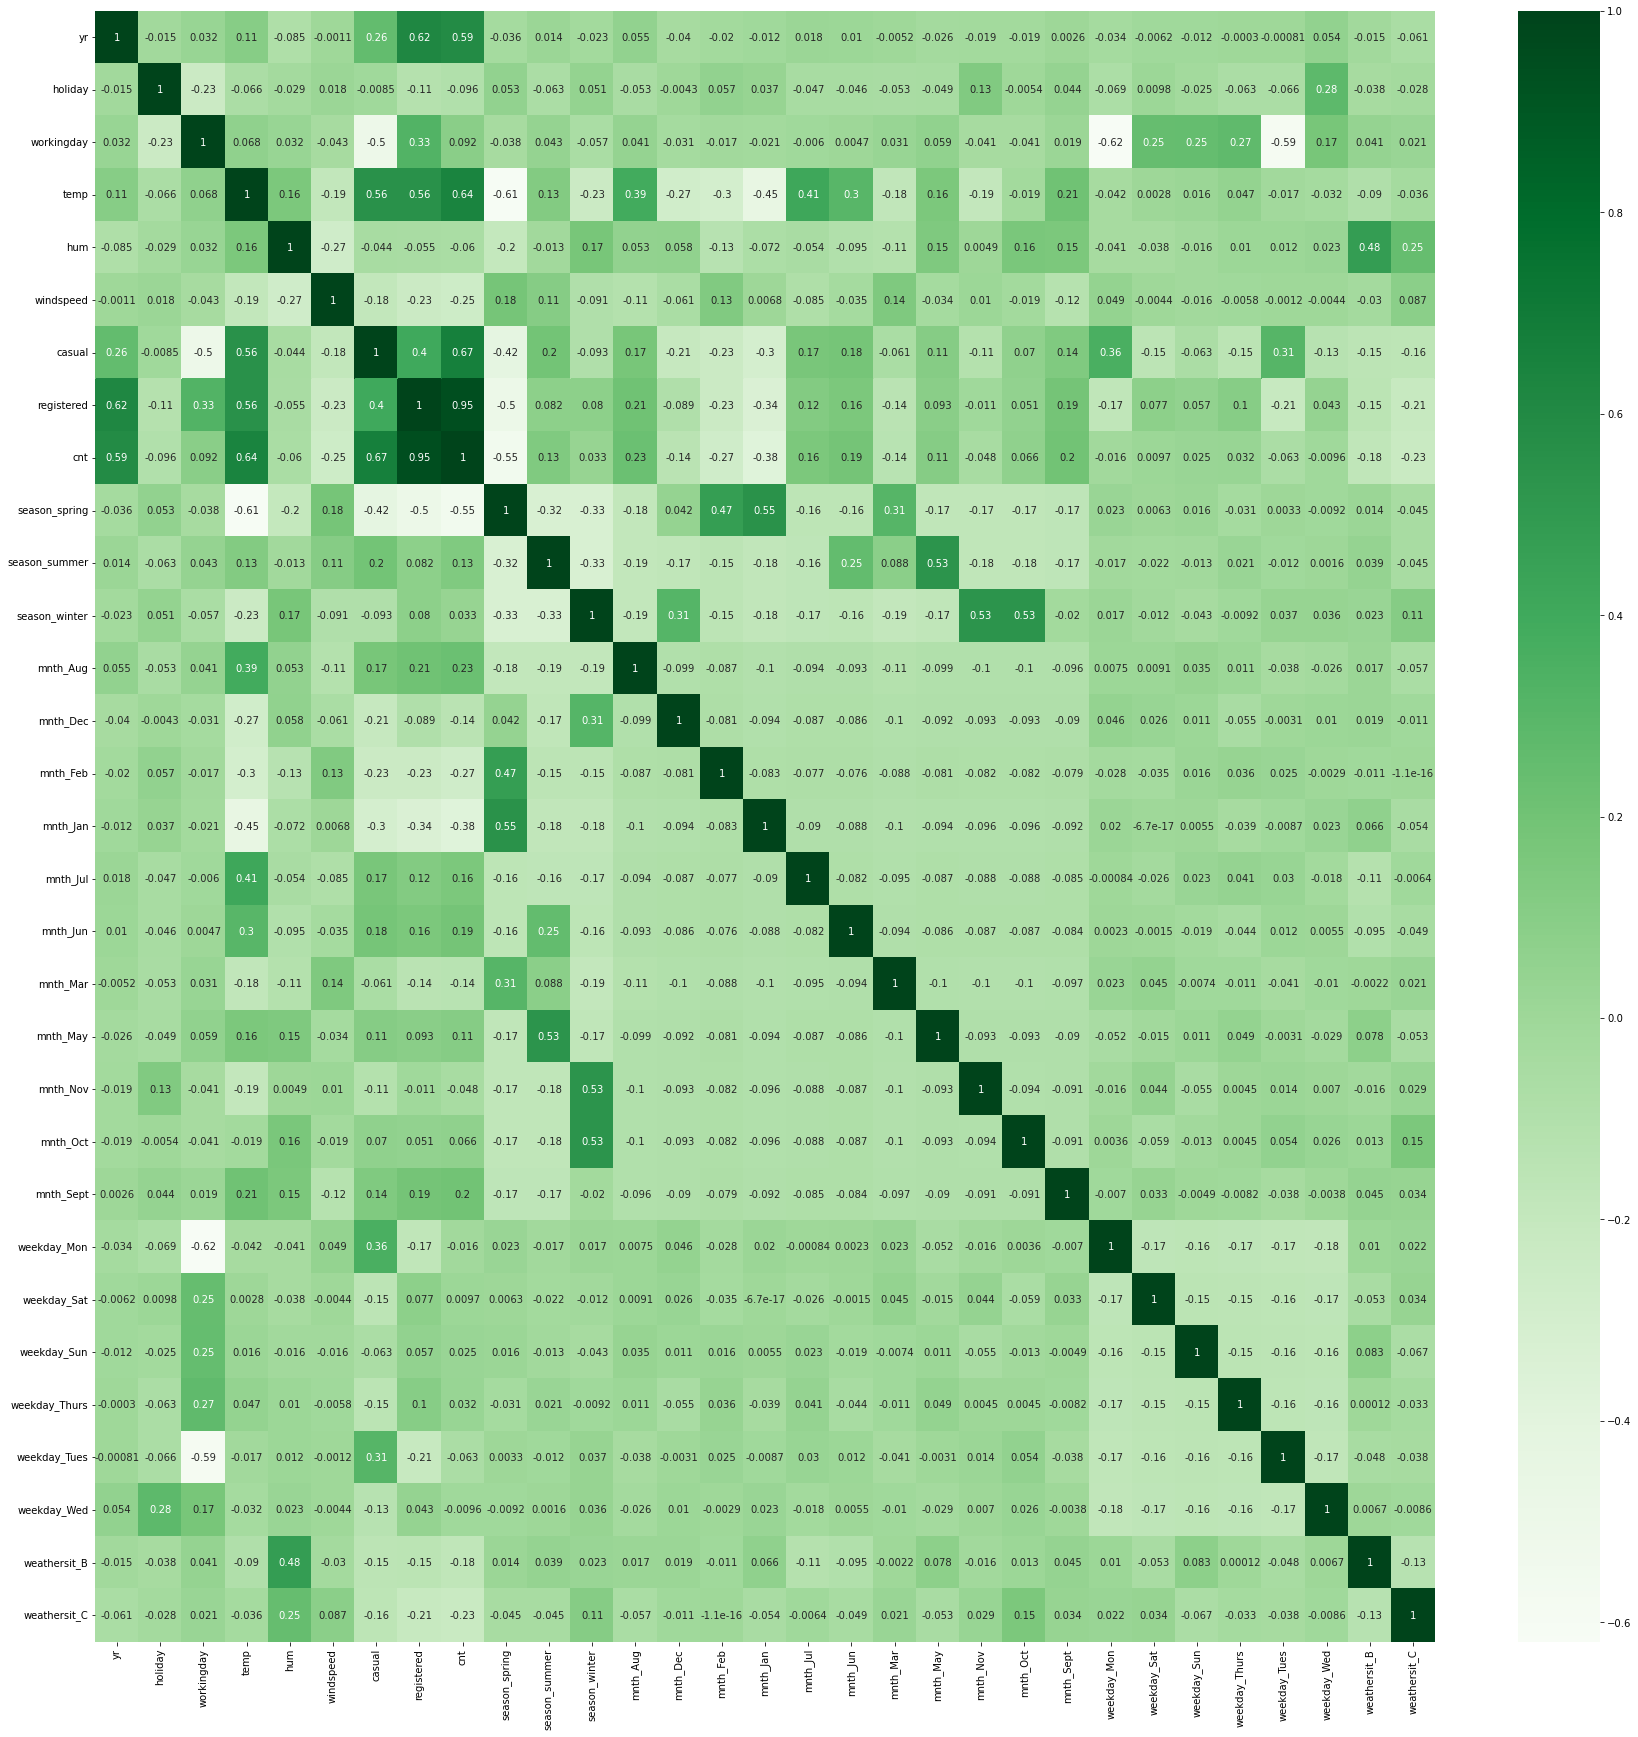

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
# plt.figure(figsize = (30, 30))
plt.show()

As we can see there is a high correlation between `temp`,`yr` and `cnt` followed by `Registered` and `casual`. As `year` is categorical variable with **0 and 1** will ignore that variable. Let's visualize those using pairplot

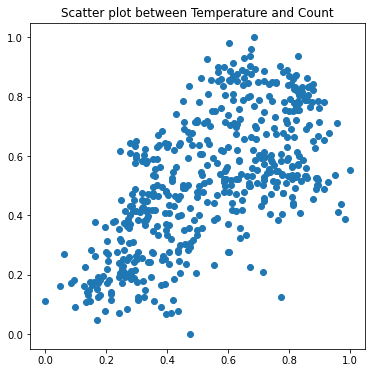

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Scatter plot between Temperature and Count')
plt.show()

In [42]:
# Lets pop out the dependent variable from train set and drop the casual and regisered columns as they have hug impact on the 'cnt' variable for model building
y_train = df_train.pop('cnt')
X_train = df_train.drop(['casual','registered'], axis=1)

In [43]:
# Converting all the features into array to avoid error in further 
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

### Building a model with all the features

In [44]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [45]:
# Calling Linear Regression for model building
lm = LinearRegression()

# Fitting a line
lm.fit(X_train, y_train)
# Print the coefficients, intercept and model summary
print('Coefficient of the model: \n',lm.coef_)
print('\n')
print("Intercept of the model: ",lm.intercept_)
print('\n')
lr.summary()

Coefficient of the model: 
 [ 2.31817825e-01 -1.33411366e+12 -1.33411366e+12  4.51049788e-01
 -1.51375285e-01 -1.87574115e-01 -4.80069648e-02  3.88342039e-02
  1.05733457e-01  1.42743711e-02 -4.55913040e-02 -3.24788704e-02
 -6.30132287e-02 -4.01955189e-02 -3.39698067e-03  9.47368081e-04
  2.36338009e-02 -4.14428711e-02  7.40051270e-03  8.07456970e-02
 -1.33411366e+12 -3.63159180e-03  5.76782227e-03 -1.35612488e-02
 -1.33411366e+12 -1.47705078e-02 -6.07910156e-02 -2.57232666e-01]


Intercept of the model:  1334113660659.4446




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.74e-182
Time:                        18:58:27   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues      0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     9.14e+15
================================================================

#### We can the results stating the adjusting R-square value which is approx 84.5% a good number. Before coming to a conclusion let's see whether we can decrease the features which do not show any impact on the target variables

# Model Building through RFE
- Now we gonna use RFE method as there are 28 columns and it is not a easy task to check with each and single feature and eliminate it. By using RFE (Recurssive Feature Elimination) we are going to eliminate the unwanted features.
- Let's pick some random number for the elimiantion (My choice is 15 half of present columns).
- After that will check the Adjusted R-squared value of the features present

In [46]:
from sklearn.feature_selection import RFE
# Initiating RFE with 14 features
lm = LinearRegression()
rfe_15 = RFE(lm,n_features_to_select = 15)
rfe_15.fit(X_train,y_train)
print(rfe_15.support_)
print(rfe_15.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 12 14  6  3 11  1  1 13 10  8
  1  9  1  1]


## Model building and Evaulation

In [47]:
col_15 = X_train.columns[rfe_15.support_]
X_train_rfe_15 = X_train[col_15]
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()
#Fit the model
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()
lm_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.13e-191
Time:                        18:58:27   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181      0.000       0.144       0.253
yr                0.2297      0.008     28.660      0.000       0.214       0.245
holiday          -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday        0.0837      0.010      8.672      0.000       0.065       0.103
temp              0.5278      0.033     15.897      0.000       0.463       0.593
hum              -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed        -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring    -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer     0.0526      0.015      3.553      0.000       0.024       0.082
season_winter     0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul         -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sept         0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Mon       0.0937      0.012      8.045      0.000       0.071       0.117
weekday_Tues      0.0405      0.012      3.304      0.001       0.016       0.065
weathersit_B     -0.0578      0.010     -5.559      0.000      -0.078      -0.037
weathersit_C     -0.2463      0.026     -9.449      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### As p-value for holiday is higher for `holiday` column which is very high lets drop it and split the data again for model building

##### By the above sumary for the 14 feature model we can see the Adjusted R-Square is `84.3%` comparing with the previous model it has slight decrease of 1% which says we can check with these selected variables.
- Before that lets have a look into multicollinearuty problem within the selected variables

In [48]:
a = X_train_rfe_15.drop(columns=['const'],axis = 1)
a

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,1,0


In [49]:
# Check for the VIF values of the feature variables. 
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Mon,12.20
12,weekday_Tues,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
13,weathersit_B,1.57


#### Here we can see here the **VIF** value for `Workingday` has large value so let's drop it and build the model

In [50]:
# Let's drop the 'hum' column
X_train_rfe_15.drop("workingday",axis=1,inplace=True)
# X_train_rfe_15

In [51]:
# Add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
lm14 = sm.OLS(y_train, X_train_rfe_15).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.13e-191
Time:                        18:58:28   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2826      0.034      8.286

In [52]:
b = X_train_rfe_15.drop(columns=['const'],axis = 1)
# X_train_rfe_15_2

In [53]:
# Check for the VIF values of the feature variables. 
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.06
4,windspeed,4.68
5,season_spring,4.03
7,season_winter,3.37
6,season_summer,2.78
12,weathersit_B,2.30
0,yr,2.08
8,mnth_Jul,1.59
9,mnth_Sept,1.39


#### Here we can see here the **VIF** value for `hum` has large value so let's drop it and build the model

In [54]:
# Let's drop the 'hum' column
X_train_rfe_15.drop("hum",axis=1,inplace=True)
# X_train_rfe_15_2

In [55]:
# Add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
lm13 = sm.OLS(y_train, X_train_rfe_15).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.73e-189
Time:                        18:58:28   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2039      0.029      6.987

In [56]:
c = X_train_rfe_15.drop(columns=['const'],axis = 1)
# X_train_rfe_15_3

In [57]:
# Check for the VIF values of the feature variables. 
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,season_summer,2.23
4,season_spring,2.13
0,yr,2.07
6,season_winter,1.84
7,mnth_Jul,1.59
11,weathersit_B,1.55
8,mnth_Sept,1.34
9,weekday_Mon,1.23


After many iteration using `RFE` p-values seems to be in significant range where as Adjacant R-square value dropped from **84.5%** using `28` features to **83.8%** using `13` features .

## Residual Analysis

In [58]:
y_train_pred = lm13.predict(X_train_rfe_15)

Text(0.5, 0, 'Errors')

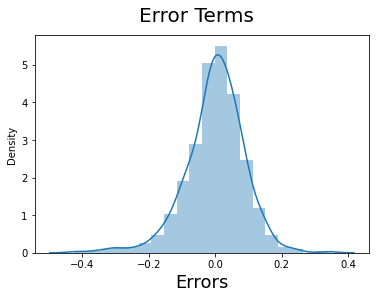

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

In [60]:
scal_var
df_test[scal_var] = scaler.transform(df_test[scal_var])

In [61]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)


In [62]:
X_test

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [63]:
rfe_col = c.columns
rfe_col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Mon', 'weekday_Tues',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [64]:
# Subsetting testing data for 7 selected columns
X_test_rfe_15 = X_test[rfe_col]

X_test_rfe_15

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_B,weathersit_C
184,0,1,0.831783,0.084219,0,0,0,1,0,0,0,1,0
535,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,0,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.257562,0.287411,1,0,0,0,0,0,1,1,0
702,1,0,0.519232,0.283397,0,0,1,0,0,0,0,0,0
127,0,0,0.584649,0.069510,0,1,0,0,0,0,1,0,0
640,1,0,0.745598,0.052115,0,0,1,0,0,0,0,1,0


In [65]:
# Add a constant to the model
X_test_rfe_15 = sm.add_constant(X_test_rfe_15)
X_test_rfe_15.shape
X_test_rfe_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   season_summer  219 non-null    uint8  
 7   season_winter  219 non-null    uint8  
 8   mnth_Jul       219 non-null    uint8  
 9   mnth_Sept      219 non-null    uint8  
 10  weekday_Mon    219 non-null    uint8  
 11  weekday_Tues   219 non-null    uint8  
 12  weathersit_B   219 non-null    uint8  
 13  weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(9)
memory usage: 12.2 KB


In [66]:
# r2_score for rfe variables
from sklearn.metrics import r2_score
y_pred = lm13.predict(X_test_rfe_15)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test, y_pred))

0.8417663379681484
0.8076325994389695


### Therefore the model with 13 features given R-squared values for test data is `80.7%` where on Training data the value is `84.2%` and Adjusant R-squared value on the Train data is `83.8%`

#### Therefore this is the final simple model we can build using the 13 variables shown above.